## **DATA 622 Final Project**

Assignment:
- Choose a dataset
You get to decide which dataset you want to work on. The data set must be different from the ones used in previous homeworks You can work on a problem from your job, or something you are interested in. You may also obtain a dataset from sites such as Kaggle, Data.Gov, Census Bureau, USGS or other open data portals. 
- Select one of the methodologies studied in weeks 1-10, and another methodology from weeks 11-15 to apply in the new dataset selected.
- To complete this task:. 
    - Describe the problem you are trying to solve.
    - Describe your datases and what you did to prepare the data for analysis. 
    - Methodologies you used for analyzing the data
    - What's the purpose of the analysis performed
    - Make your conclusions from your analysis. Please be sure to address the business impact (it could be of any domain) of your solution.

Deliverable:
- Your final presentation (essay or video) should include:
    - The traditional R file or Python file and essay,
    - An Essay (minimum 500 word document) or Video ( 5 to 8 minutes recording). Include the execution and explanation of your code. The video can be recorded on any platform of your choice (Youtube, Free Cam).

### Setup

For this project, I used the [Bank Customer Information and Marketing Response](https://www.kaggle.com/datasets/zain280/bank-customer-information-and-marketing-response) dataset downloaded from Kaggle

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

Analysis

The ultimate goal of this project will be to determine if the individual actually responded to the marketing information or not. 

In [3]:
responses_raw = pd.read_csv('bank.csv')

In [4]:
responses_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
responses_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


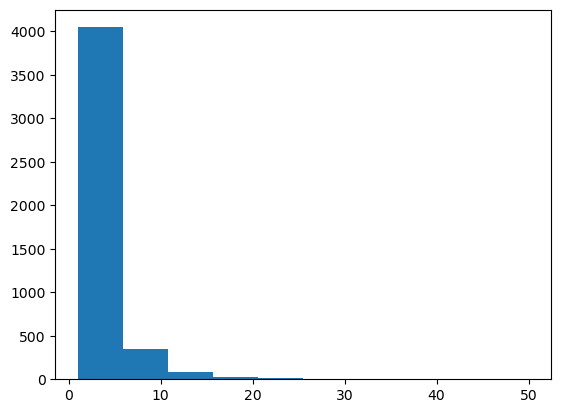

In [181]:
plt.hist(responses_raw['campaign'], bins=10)
plt.show()

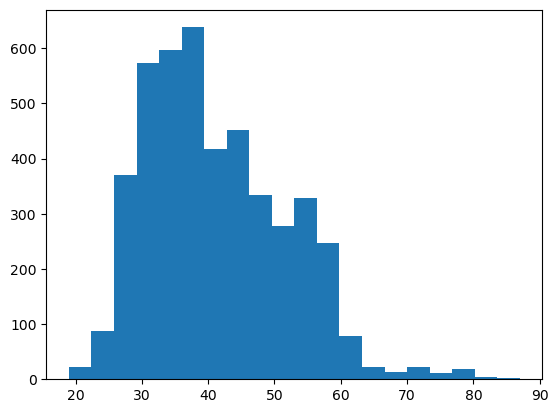

In [16]:
plt.hist(responses_raw['age'], bins=20)
plt.show()

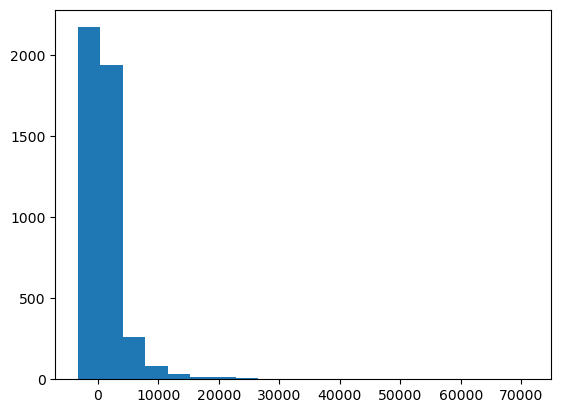

In [42]:
plt.hist(responses_raw['balance'], bins=20)
plt.show()

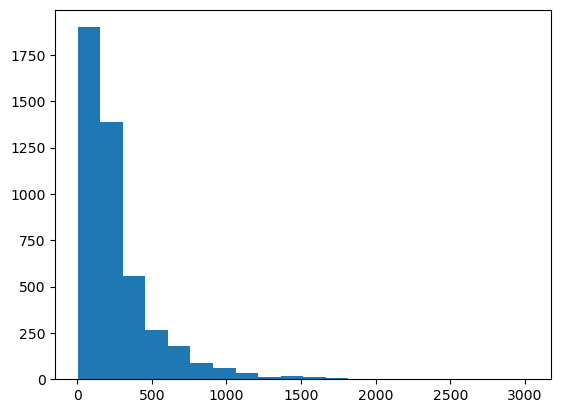

In [152]:
plt.hist(responses_raw['duration'], bins=20)
plt.show()

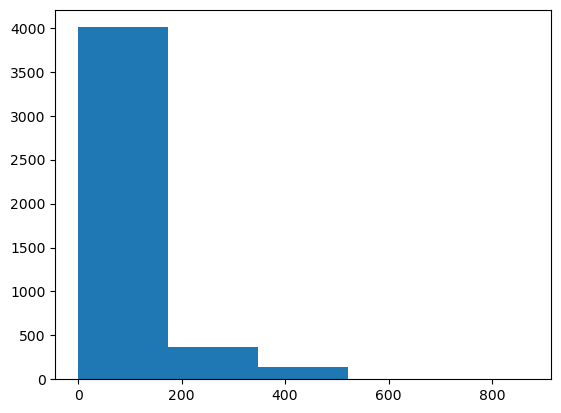

In [164]:
plt.hist(responses_raw['pdays'], bins=5)
plt.show()

In [176]:
X_raw['pdays'].mean()

39.766644547666445

In [127]:
from sklearn.preprocessing import PowerTransformer

In [131]:
import numpy as np

Transform balance

In [134]:
X_balance = np.array(X_raw['balance']).reshape(-1,1)

In [137]:
transformer = PowerTransformer()
balance_new = transformer.fit_transform(X_balance)

In [149]:
X_balance_transformed = pd.DataFrame(balance_new)[0]

Transform duration

In [154]:
X_duration = np.array(X_raw['duration']).reshape(-1,1)

In [156]:
transformer = PowerTransformer()
duration_new = transformer.fit_transform(X_duration)

In [157]:
X_duration_transformed = pd.DataFrame(duration_new)[0]

<Axes: ylabel='Frequency'>

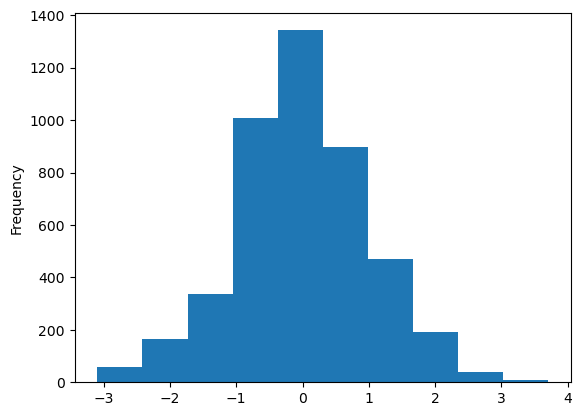

In [158]:
X_duration_transformed.plot.hist()

Transform campaign

In [182]:
X_campaign = np.array(X_raw['campaign']).reshape(-1,1)

In [183]:
transformer = PowerTransformer()
campaign_new = transformer.fit_transform(X_campaign)

In [184]:
X_campaign_transformed = pd.DataFrame(campaign_new)[0]

<Axes: ylabel='Frequency'>

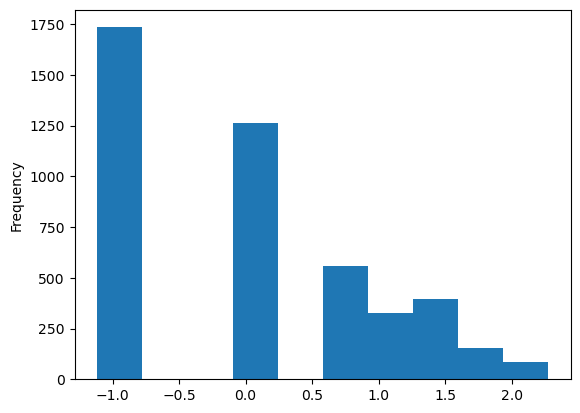

In [185]:
X_campaign_transformed.plot.hist()

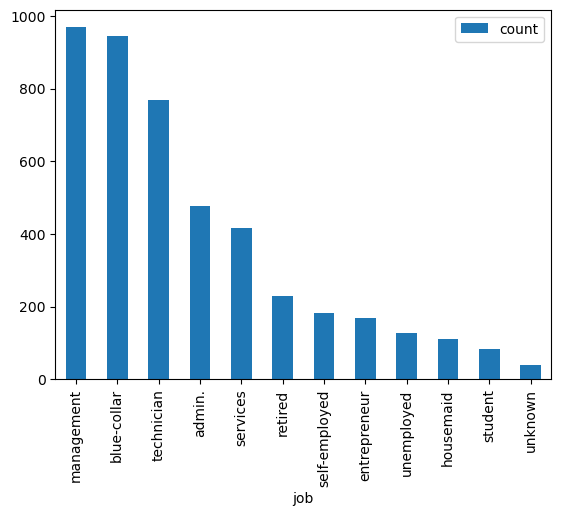

In [25]:
pd.DataFrame(responses_raw['job'].value_counts()).plot.bar()
plt.show()

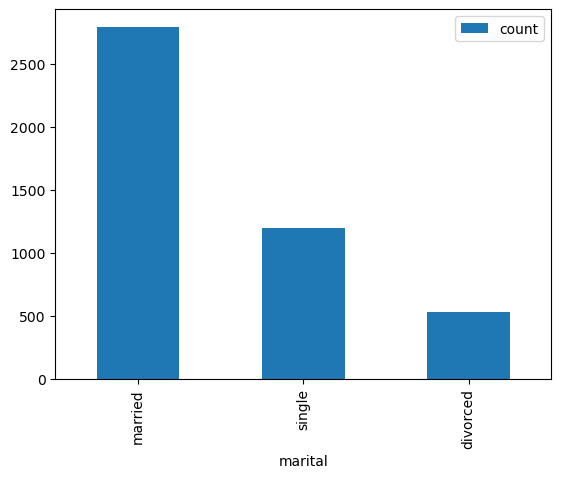

In [27]:
pd.DataFrame(responses_raw['marital'].value_counts()).plot.bar()
plt.show()

<Axes: xlabel='education'>

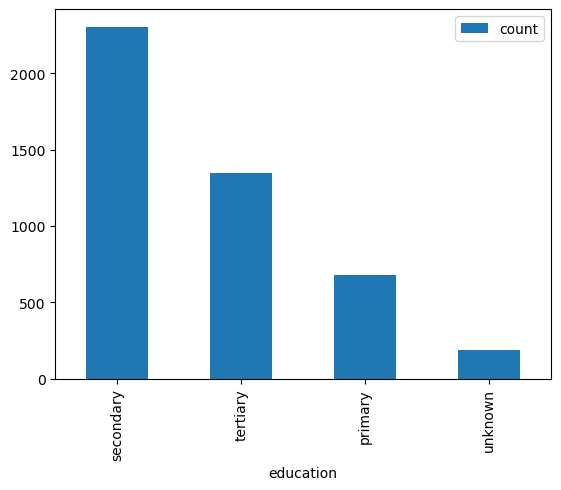

In [29]:
pd.DataFrame(responses_raw['education'].value_counts()).plot.bar()

In [41]:
pd.crosstab(responses_raw.job,responses_raw.y, normalize='index')

y,no,yes
job,,
admin.,0.878661,0.121339
blue-collar,0.927061,0.072939
entrepreneur,0.910714,0.089286
housemaid,0.875000,0.125000
management,0.864809,0.135191
retired,0.765217,0.234783
self-employed,0.890710,0.109290
services,0.908873,0.091127
student,0.773810,0.226190


In [ ]:
pd.crosstab(responses_raw['job'],responses_raw['y'])

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


Bin the age data

In [ ]:
bins = [0,20,40,60,80,100]
X_raw['age_bins'] = pd.cut(X_raw['age'],bins=bins)

Machine Learning

1. The response variable is heavily imbalanced, so will want to rebalance the data set to ensure better data

In [202]:
X_raw = responses_raw.drop('y', axis=1)
y_raw = responses_raw['y']

In [199]:
X_transformed = pd.concat([X_balance_transformed,X_duration_transformed],axis=1).set_axis(['balance_transformed','duration_transformed'], axis='columns')

In [203]:
X_raw_mod = pd.concat([X_raw, X_transformed],axis=1)

In [204]:
X_raw_mod

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance_transformed,duration_transformed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0.282211,-0.888110
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1.209846,0.166967
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0.130429,-0.023029
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0.174936,0.056370
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,-0.445382,0.196908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,-1.340442,0.627321
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,-13.487834,-0.225769
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,-0.283836,-0.239605
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0.053555,-0.403098


In [108]:
X_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_bins
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,"(20, 40]"
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,"(20, 40]"
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,"(20, 40]"
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,"(20, 40]"
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,"(40, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,"(20, 40]"
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,"(40, 60]"
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,"(40, 60]"
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,"(20, 40]"


In [109]:
X_categorical = X_raw.loc[:,['job','marital','education','contact','poutcome','age_bins']]

In [110]:
label_encoder = OneHotEncoder()
label_encoder.fit(X_categorical)

OneHotEncoder()

In [111]:
X_cat_transform = label_encoder.transform(X_categorical).toarray()

In [205]:
X_cat = pd.DataFrame(X_cat_transform, columns=label_encoder.get_feature_names_out())

In [113]:
encoder = LabelEncoder()
y_new = encoder.fit_transform(y_raw)

In [52]:
pd.Series(y_new).value_counts()

0    4000
1     521
Name: count, dtype: int64

In [53]:
y_raw.value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

Binarize several variables

In [116]:
X_binary = X_raw.loc[:,['default','housing','loan']]

In [122]:
default_binarized = pd.Series(encoder.fit_transform(X_binary['default']))
housing_binarized = pd.Series(encoder.fit_transform(X_binary['housing']))
loan_binarized = pd.Series(encoder.fit_transform(X_binary['loan']))

In [126]:
X_binary_new = pd.concat([default_binarized,housing_binarized,loan_binarized],axis=1).set_axis(['default','housing','loan'], axis='columns')

In [206]:
X_cat

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,"age_bins_(0, 20]","age_bins_(20, 40]","age_bins_(40, 60]","age_bins_(60, 80]","age_bins_(80, 100]"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [207]:
X_binary_new

,default,housing,loan
0,0,0,0
1,0,1,1
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
4516,0,1,0
4517,1,1,1
4518,0,0,0
4519,0,0,0


In [208]:
X_transformed

,balance_transformed,duration_transformed
0,0.282211,-0.888110
1,1.209846,0.166967
2,0.130429,-0.023029
3,0.174936,0.056370
4,-0.445382,0.196908
...,...,...
4516,-1.340442,0.627321
4517,-13.487834,-0.225769
4518,-0.283836,-0.239605
4519,0.053555,-0.403098


In [213]:
X_model = pd.concat([X_cat,X_binary_new,X_transformed],axis=1)

In [214]:
X_model

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,"age_bins_(0, 20]","age_bins_(20, 40]","age_bins_(40, 60]","age_bins_(60, 80]","age_bins_(80, 100]",default,housing,loan,balance_transformed,duration_transformed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0.282211,-0.888110
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,1.209846,0.166967
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0.130429,-0.023029
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,0.174936,0.056370
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,-0.445382,0.196908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,-1.340442,0.627321
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,1,1,-13.487834,-0.225769
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,-0.283836,-0.239605
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0.053555,-0.403098


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_new, test_size=0.33, random_state=1211)

Logistic Regression

In [216]:
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)

LogisticRegression()

In [217]:
clf1.score(X_test,y_test)

0.8987935656836461

Random Forest Classifier

In [220]:
clf2 = RandomForestClassifier()
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [221]:
clf2.score(X_test, y_test)

0.8873994638069705

Support Vector Machine

In [223]:
clf3 = SVC()
clf3.fit(X_train, y_train)

SVC()

In [224]:
clf3.score(X_test, y_test)

0.9021447721179625

Neural Network

In [226]:
clf4 = MLPClassifier(max_iter=5000)
clf4.fit(X_train, y_train)

MLPClassifier(max_iter=5000)

In [227]:
clf4.score(X_test, y_test)

0.878686327077748